# Линейная регрессия: аналитическое решение #

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('seaborn')

In [2]:
column_names = [
    'CRIM',    # уровень преступности на душу населения по городам
    'ZN',      # доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов
    'INDUS',   # доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город
    'CHAS',    # фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае)
    'NOX',     # концентрация оксидов азота (в десятимиллионных долях)
    'RM',      # среднее количество комнат в доме
    'AGE',     # доля зданий, построенных до 1940 г. и занимаемых владельцами
    'DIS',     # взвешенные расстояния до пяти бостонских центров занятости
    'RAD',     # индекс доступности радиальных автомобильных дорог
    'TAX',     # полная ставка налога на имущество за каждые 10 000 долларов стоимости
    'PTRATIO', # соотношение учеников и учителей по городам
    'B',       # 1000 * (Bk — 0.63), где Bk — доля граждан афроамериканского происхождения по городам
    'LSTAT',   # процент населения с низким статусом
    'MEDV'     # медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак)
]
boston_data = pd.read_csv('data/housing.csv', names=column_names, header=None, sep=r'\s+')
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


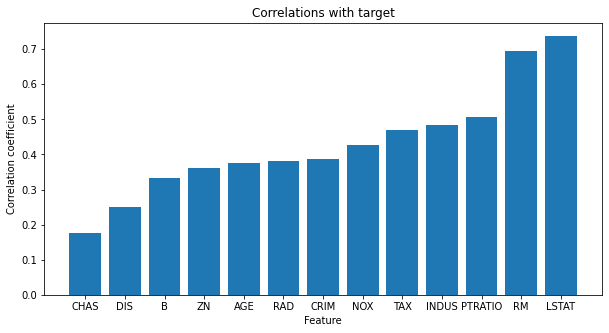

In [4]:
corr_with_target = boston_data.corr().MEDV.abs().sort_values()
corr_with_target.drop('MEDV', inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target')
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation coefficient');

In [5]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [6]:
def linear_regression(X, y):
    # Вектор из единиц
    ones = np.ones(X.shape[0])
    
    # Добавление вектора к таблице первым столбцом
    X = np.column_stack([ones, X])
    
    # Вычисление обратной матрицы Q
    Q = np.linalg.inv(X.T @ X)
    
    # Вектор коэффициентов
    return Q @ X.T @ y

In [7]:
w = linear_regression(X, y)
print(f'Vector w: {w}')
print(f'w0: {w[0]:.2f}')
print(f'w1: {w[1]:.2f}')

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [8]:
x_example = 5.18
y_predict = w[0] + w[1] * x_example
print(f'Predicterd price value: {float(y_predict):.2f}')

Predicterd price value: 29.63


In [9]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X, y_true, alpha=0.7, label='Sample data')
    ax.plot(X, y_predict, color='black', label='Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor='white', fontsize=11)

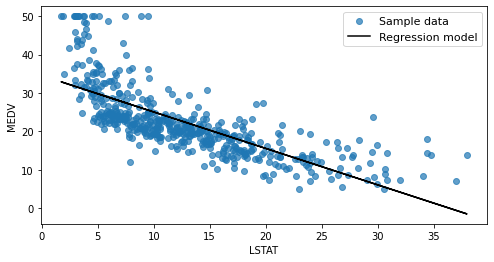

In [10]:
y_predict = w[0] + w[1] * X
plot_regression_2d(X, y, y_predict)

## АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN ##

In [11]:
from sklearn import linear_model

In [12]:
lr_lstat = linear_model.LinearRegression()
lr_lstat.fit(X, y)
print(f'w0: {lr_lstat.intercept_}')
print(f'w1: {lr_lstat.coef_}')

w0: 34.5538408793831
w1: [-0.95004935]


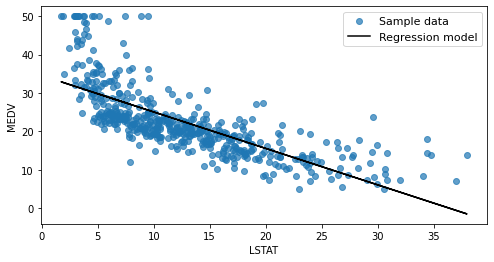

In [13]:
y_predict = lr_lstat.predict(X)
plot_regression_2d(X, y, y_predict)

### Решение для всех признаков ###

In [14]:
# Список факторов (за исключением целевого)
features = boston_data.drop(columns=['MEDV']).columns

# Составление матрицы наблюдений X и вектора ответов y
X = boston_data[features]
y = boston_data.MEDV

lr_full = linear_model.LinearRegression()

# Обучение модели - поиск параметров по МНК
lr_full.fit(X, y)

LinearRegression()

In [15]:
# Составление таблицы из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
# Составление строки таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


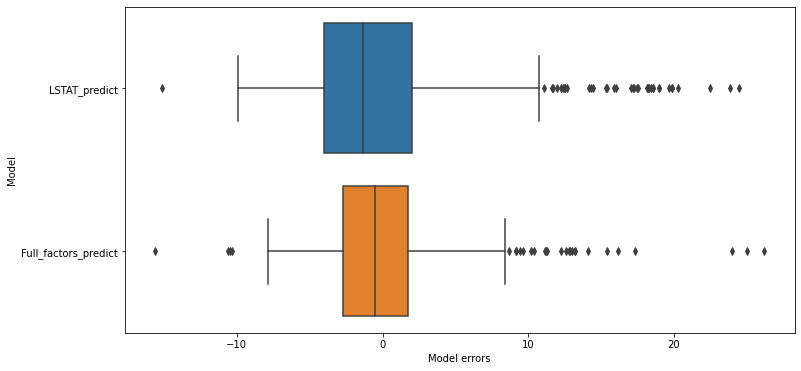

In [16]:
# Визуализация ошибки
fig, ax = plt.subplots(figsize=(12, 6))

# Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])

# Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])

# Составление DataFrame из ошибок для удобства визуализации
errors_df = pd.DataFrame({
    'LSTAT_predict': y_errors_lstat,
    'Full_factors_predict': y_errors_full
})
sns.boxplot(
    data=errors_df,
    orient='h',
    ax=ax
)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

###  Задание 2.7 ###

В данных появился новый участок со следующими параметрами:
```
CRIM         0.35114
ZN           0.00000
INDUS        7.38000
CHAS         0.00000
NOX          0.49300
RM           6.04100
AGE         49.90000
DIS          4.72110
RAD          5.00000
TAX        287.00000
PTRATIO     19.60000
B          396.90000
LSTAT        7.70000
```
Сделать предсказание медианной стоимости (MEDV) для данного участка c помощью модели lr_full. Результат предсказания в тысячах долларов. Ответ округлить до второго знака после точки-разделителя.

***Ответ - 22.87***

In [17]:
# display(lr_full.predict(X))
new_dict = {
    'CRIM': [0.35114],
    'ZN': [0],
    'INDUS': [7.38000],
    'CHAS': [0],
    'NOX': [0.49300],
    'RM': [6.04100],
    'AGE': [49.90000],
    'DIS': [4.72110],
    'RAD': [5],
    'TAX': [287.00000],
    'PTRATIO': [19.60000],
    'B': [396.90000],
    'LSTAT': [7.70000],
}
X_new = pd.DataFrame(new_dict)
display(X_new)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0,7.38,0,0.493,6.041,49.9,4.7211,5,287.0,19.6,396.9,7.7


In [18]:
print(round(lr_full.predict(X_new)[0], 2))

22.87


###  Задание 2.8 ###
Дан набор данных о стартапах и их прибыли (в долларах) в трёх различных штатах США.

Столбцы:

- **`R&D Spend`**&nbsp;&mdash; расходы на исследования.
- **`Administration`**&nbsp;&mdash; административные расходы.
- **`Marketing Spend`**&nbsp;&mdash; расходы на маркетинг.
- **`State*`**&nbsp;&mdash; штат.
- **`Profit`**&nbsp;&mdash; прибыль (целевой признак).

Для обучения линейной регрессии использовать `R&D Spend`, `Administration` и `Marketing Spend`. Отделить факторы от целевой переменной.

Обучить модель линейной регрессии методом наименьших квадратов с помощью библиотеки **`numpy`** (воспользоваться формулой из модуля).

Чему равны коэффициенты линейной регрессии при признаках `R&D Spend`, `Administration` и `Marketing Spend`? Ответ ввести с точностью до второго знака после точки-разделителя.

***Ответ - 0.81, -0.03, 0.03***

In [19]:
start_df = pd.read_csv('data/50_Startups.csv')
start_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [21]:
X = start_df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = start_df['Profit']
w = linear_regression(X, y)
print(f'Intercept factor: {round(w[0], 2)}')
print(f'R&D factor: {round(w[1], 2)}')
print(f'Admin factor: {round(w[2], 2)}')
print(f'Marketing factor: {round(w[3], 2)}')

Intercept factor: 50122.19
R&D factor: 0.81
Admin factor: -0.03
Marketing factor: 0.03


# Метрики регрессии. Недостатки аналитического решения #

In [22]:
from sklearn import metrics

In [25]:
y = boston_data.MEDV
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_lstat):.3f} k$.')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_lstat)):.3f} k$.')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_lstat):.3f}')

MAE score: 4.505 k$.
RMSE score: 6.203 k$.
MAPE score: 21.352 %
R2 score: 0.544


In [26]:
y_predict_full = lr_full.predict(boston_data[features])
print(f'MAE score: {metrics.mean_absolute_error(y, y_predict_full):.3f} k$.')
print(f'RMSE score: {np.sqrt(metrics.mean_squared_error(y, y_predict_full)):.3f} k$.')
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_full) * 100:.3f} %')
print(f'R2 score: {metrics.r2_score(y, y_predict_full):.3f}')

MAE score: 3.271 k$.
RMSE score: 4.679 k$.
MAPE score: 16.417 %
R2 score: 0.741
